In [ ]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Keras specific
from keras.models import Sequential
from keras.layers import Dense
from sklearn import datasets
import numpy as np


In [ ]:
boston_data = datasets.load_boston()
df = pd.DataFrame(boston_data.data,columns=boston_data.feature_names)
df['target'] = pd.Series(boston_data.target)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
print(df.shape)

(506, 14)


In [ ]:
target_column = ['target'] 
predictors = list(set(list(df.columns))-set(target_column))

In [ ]:
X = df[predictors].values
y = df[target_column].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)

(354, 13)
(152, 13)


In [ ]:
# Define model
model = Sequential()
model.add(Dense(500, input_dim=13, activation= "relu"))
model.add(Dense(100, activation= "relu"))
model.add(Dense(50, activation= "relu"))
model.add(Dense(1))

In [ ]:
model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               7000      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               50100     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 62,201
Trainable params: 62,201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])
#history  = model.fit(X_train, y_train, epochs=100)

In [ ]:
history  = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
12/12 [==============================] - 1s 2ms/step - loss: 358.9197 - mean_squared_error: 358.9197
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: 66.1796 - mean_squared_error: 66.1796
Epoch 3/100
12/12 [==============================] - 0s 2ms/step - loss: 52.3308 - mean_squared_error: 52.3308
Epoch 4/100
12/12 [==============================] - 0s 2ms/step - loss: 57.6534 - mean_squared_error: 57.6534
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: 75.8794 - mean_squared_error: 75.8794
Epoch 6/100
12/12 [==============================] - 0s 2ms/step - loss: 55.6182 - mean_squared_error: 55.6182
Epoch 7/100
12/12 [==============================] - 0s 2ms/step - loss: 45.6892 - mean_squared_error: 45.6892
Epoch 8/100
12/12 [==============================] - 0s 2ms/step - loss: 45.7597 - mean_squared_error: 45.7597
Epoch 9/100
12/12 [==============================] - 0s 2ms/step - loss: 46.1178 - mean_squared_error: 46.1178

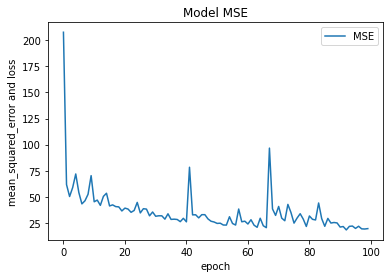

In [ ]:
#Visualize the models accuracy and loss
plt.plot(history.history["mean_squared_error"])
plt.title("Model MSE")
plt.ylabel("mean_squared_error and loss")
plt.xlabel("epoch")
plt.legend(['MSE'], loc='upper right')
plt.show()

In [ ]:
pred_train= model.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train)))

pred= model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred))) 

4.494450875684164
6.5345135093111155
